# Exploratory Data Analysis for Microsoft 

###  About: The notebook contains the analysis of  . The goal of this analysis is to offer meaningful insights to a new movie production company that is entering the market by answering the following questions. 

In [1]:
"""Getting all relevent imports into the file"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [2]:
"""Our clean Data frame that contains information From IMDBs website and learn-co project repo"""
fulldf=pd.read_csv('newfulldf.csv')

In [3]:
fulldf.head() # Display the Data to make sure its as desired.

,Title,Movie Rating,Year,Gross Income in millions (USD),Movie Genre,Movie Runtime,IMDb Rating,Votes,Budget in millions (USD),Profit percent
0,10 Cloverfield Lane,PG-13,2016,72.08,"Drama,Horror,Mystery",103,7.2,281319.0,5.0,1341.600000
1,10 Days in a Madhouse,R,2015,0.01,Drama,111,6.3,956.0,12.0,-99.916667
2,10 Things I Hate About You,PG-13,1999,38.18,"Comedy,Drama,Romance",97,7.3,287984.0,13.0,193.692308
3,102 Dalmatians,G,2000,66.96,"Adventure,Comedy,Family",100,4.9,33907.0,85.0,-21.223529
4,10th & Wolf,R,2006,0.05,"Crime,Drama,Thriller",107,6.3,6043.0,8.0,-99.375000


In [4]:
"""Funtion to plot bargraphs using the (Dataframe, xvalues,yvalues,string title)"""
# We will plot bar graphs more than twice so makes sense to have a funtion do this
def bargraph (Dataframe,xColumn,yColumn,str,):
    plt.figure(figsize=(10,5))
    sns.barplot(y=yColumn,x=xColumn)
    plt.title(str,weight='bold').set_fontsize('18')
    

In [5]:
"""Funtion to graph boxplot using the (Data,string title)"""
# We will make  boxplot graphs than twice so makes sense to have a funtion do this
def boxplot (Data,str,):
    plt.figure(figsize=(10,5))
    sns.boxplot(Data)
    plt.title(str,weight='bold').set_fontsize('18')
    plt.show()
    return Data.describe()

In [45]:
"""Funtion to Visualize the Runtime data (Data,String title)"""
def distribution (Data,str,):
    plt.figure(figsize=(10,5))
    graph = sns.distplot(Data)
    graph.axvline(Data.median(),color='r',linestyle='-')
    graph.axvline(Data.mean(),color='g',linestyle='--')
    graph.axvline(Data.mode()[0],color='b',linestyle='-')
    plt.legend({'Median':Data.median(),'Mean':Data.mean(),'Mode':Data.mode()})
    plt.title(str,weight='bold').set_fontsize('18')
    plt.xlabel('Runtime in minutes')
    plt.show()
    return Data.describe() 

In [7]:
"""Funtion to Visualize scatter plot (x,y,line color,String title)"""
def scatter (x,y,data,linecolor,str):
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=x, y=y,data=data,color=linecolor)
    plt.title(str,weight='bold').set_fontsize('18')

In [8]:
def lineplot (X,Y,Title,Color):
    plt.figure(figsize=(15,10))
    plt.title(Title,weight='bold').set_fontsize('18')
    sns.lineplot(y=Y, x=X,color=Color)

### 1. What genre of Movies will yield the best return.

#### To answer this question lets first look at the genres of the top 20 Most profitable movies  

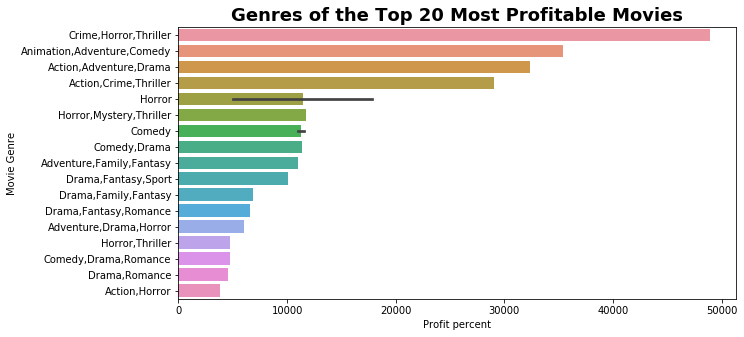

In [9]:
"""Look at the Genre of the Top 20 Most Profitable movies"""
group_df = fulldf.sort_values('Profit percent',ascending=False).reset_index().head(20)
bargraph(group_df,group_df['Profit percent'],group_df['Movie Genre'],"Genres of the Top 20 Most Profitable Movies")


#### Looks like the movie genres our combinations, to examine sinlge genres we will have to split our data.

In [10]:
# split the genre combinations intoa list of genres in the fulldf using comma as the delimiter
fulldf['Movie Genre'] = fulldf['Movie Genre'].str.split(',')

In [11]:
#fulldf.head()# Display the Data to make sure its as desired

In [12]:
"""Explode to create new rows based on genre list while replicating all other column values."""
single_genre_df = fulldf.explode('Movie Genre')

In [13]:
#single_genre_df.info()# Display the Data to make sure its as desired

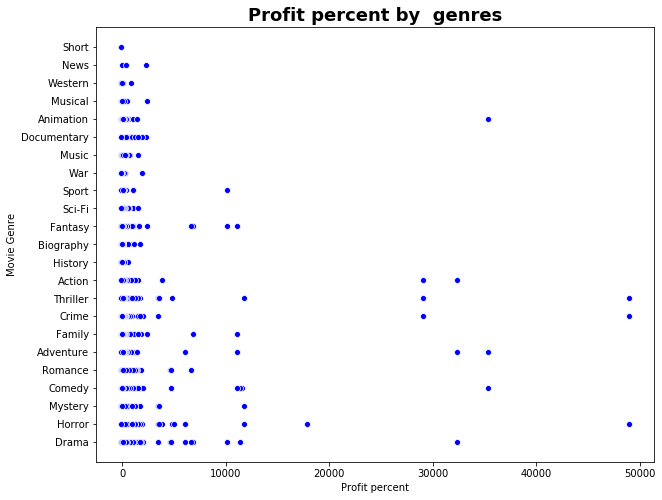

In [14]:
"""Visualtize to see over all Percent profit for top 3 most profitable movies"""
scatter ('Profit percent','Movie Genre',single_genre_df,'blue','Profit percent by  genres')

#### Looks like the profit percent return on every genre has outliers, so we should consider the median values for a more appropriate measure of its central tendency. Lets look at this again without outliers

In [15]:
"""Group the data by genre and find median of each group"""
single_genre_median_df = single_genre_df.groupby('Movie Genre').median()

In [16]:
#sort the profit percent  data in descending form 
single_genre_median_df=single_genre_median_df.sort_values('Profit percent',ascending=False).reset_index()


In [17]:
#single_genre_median_df.head(len(single_genre_df))# Display the Data to make sure its as desired.

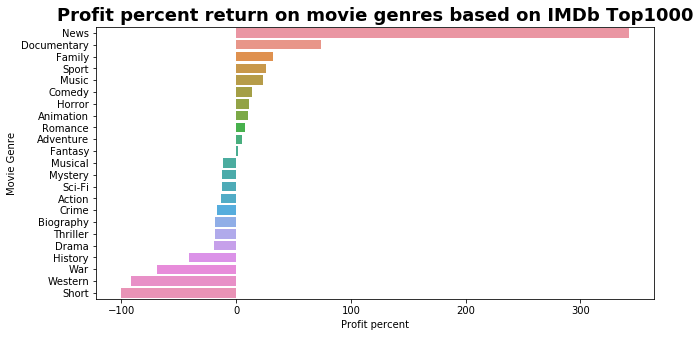

In [18]:
"""Look at the Proft Percent Return For each Genre """
bargraph(single_genre_median_df,single_genre_median_df['Profit percent'],single_genre_median_df['Movie Genre'],"Profit percent return on movie genres based on IMDb Top1000")

#### Before we proceed we want to make sure we have enough data in each genre 

In [19]:
"""Unique Genre list"""
genres = list (single_genre_df['Movie Genre'].unique())
#genres

In [20]:
"""Create a dictionary of data frames that have single genres and save the ones that have more than 30 data points"""
genres_df = {}
limit_genres_df = {}
limit_genres_list = []
for genre in genres:
    genres_df[genre] = single_genre_df[single_genre_df['Movie Genre'] == genre]
    if len(genres_df[genre]) > 50:
        limit_genres_list.append(genre)
        limit_genres_df[genre] =  single_genre_df[single_genre_df['Movie Genre'] == genre]
        print(genre,len(genres_df[genre]))


Drama 1199
Horror 197
Mystery 179
Comedy 873
Romance 383
Adventure 398
Family 178
Crime 428
Thriller 371
Action 552
History 62
Biography 172
Fantasy 173
Sci-Fi 140
Sport 53
Music 72
Animation 130


#### Now that we know which genres have sufficient data to conduct our study Lets filter our orginal data frame with only these genres

In [21]:
"""create a new df with the filtered genre"""
new_df = single_genre_df[single_genre_df['Movie Genre'].isin(limit_genres_list)]
#df['Movie Genre'].unique()# View the genres of this new df to make sure

In [22]:
"""Group the data by genre and find median of each group"""
median_df = new_df.groupby('Movie Genre').median()

In [23]:
#sort the profit percent  data in descending form 
median_df = median_df.sort_values('Profit percent',ascending=False).reset_index()


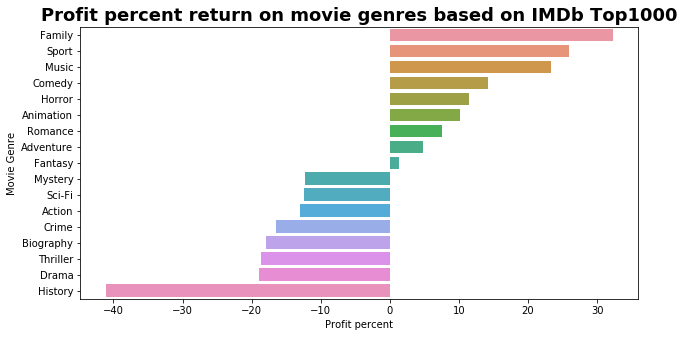

In [24]:
"""Look at the Proft Percent Return For each Genre """
bargraph(median_df,median_df['Profit percent'],median_df['Movie Genre'],"Profit percent return on movie genres based on IMDb Top1000")

In [25]:
"""Save the top 3 genres as a list """
top3_list = median_df.loc[:2]['Movie Genre'].to_list()
top3_list

['Family', 'Sport', 'Music']

In [26]:
"""Save the top 3 genres as a pandas dataframe"""
top3_df = single_genre_df[single_genre_df['Movie Genre'].isin(top3_list)]

### INSIGHT 1:
#### Based on our analysis it seems Family , Music and Sport are the most profitable genres. 
#### History  Drama and Thriller are the least profitable movie genres 
#### Notably sci-fi which is lately been very popular overall is not a very profitable genre.

### 2. What runtime is ideal for the top 3 most profitable genres.

#### Lets look at whats happening to the Runtime for Family movies

 for i in range(0,len(top3_list)):
    distribution(genres_df[top3_list[i]],"Runtime of {} Movies ".format(top3_list[i]))
    genres_df[top3_list[i]]['Movie Runtime'].describe()

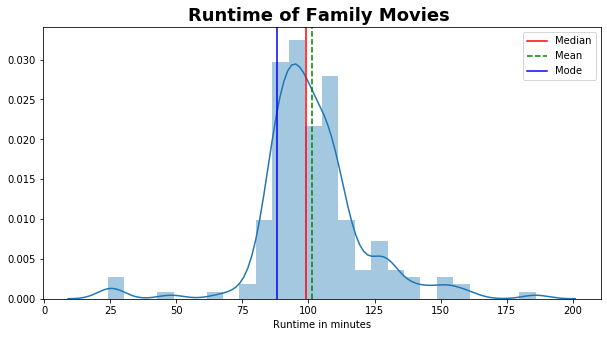

count    178.000000
mean     101.483146
std       20.092786
min       24.000000
25%       91.000000
50%       99.000000
75%      109.000000
max      186.000000
Name: Movie Runtime, dtype: float64

In [27]:
"""visualize the distribution of run time for Family movies"""
i= 0 #1 most profitable
distribution(genres_df[top3_list[i]]['Movie Runtime'],"Runtime of {} Movies ".format(top3_list[i]))


#### Looks like the runtime of Family movies is positively skewed so we wil use the median of 99 mins as a measure of its central tendency

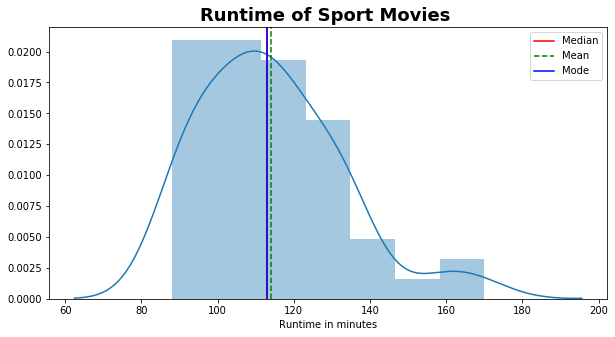

count     53.000000
mean     113.943396
std       18.746707
min       88.000000
25%      100.000000
50%      113.000000
75%      124.000000
max      170.000000
Name: Movie Runtime, dtype: float64

In [28]:
"""visualize the distribution of run time for Music based movies"""
i = 1  #2 most profitable
distribution(genres_df[top3_list[i]]['Movie Runtime'],"Runtime of {} Movies ".format(top3_list[i]))

#### Looks like the runtime of Sport based movies is positively skewed so we will use the median of 113 mins as a measure of its central tendency

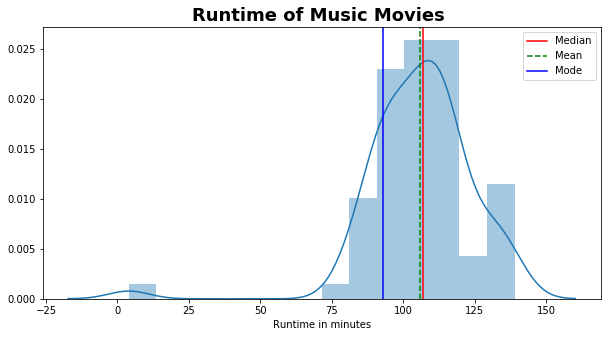

count     72.000000
mean     105.972222
std       18.841049
min        4.000000
25%       94.750000
50%      107.000000
75%      116.000000
max      139.000000
Name: Movie Runtime, dtype: float64

In [46]:
"""visualize the distribution of run time for Sport based movies"""
i = 2 # # 1 most profitable
distribution(genres_df[top3_list[i]]['Movie Runtime'],"Runtime of {} Movies ".format(top3_list[i]))

#### Looks like the runtime of Family movies is negatively skewed so we will use the median of 107 mins a measure of its central tendency

### INSIGHT 2:
#### The top 3 most profitable genres have the following recommended run time , 
#### Family - 99 mins
#### Music - 107 mins
#### Sports - 112 mins

In [30]:
profitable_genres_df = single_genre_df[single_genre_df['Profit percent'] > 0]

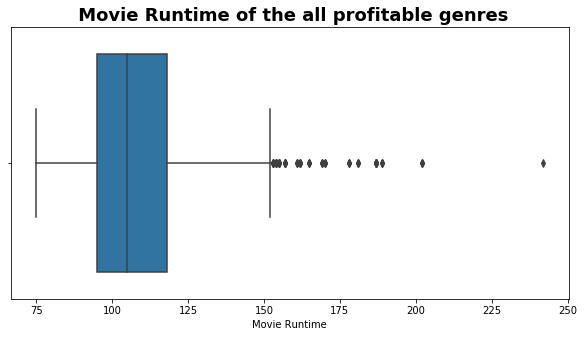

count    2721.000000
mean      108.369717
std        18.367251
min        75.000000
25%        95.000000
50%       105.000000
75%       118.000000
max       242.000000
Name: Movie Runtime, dtype: float64

In [31]:
"""Visualtize to see over all Run time for top 3 most profitable movies"""
boxplot(profitable_genres_df['Movie Runtime']," Movie Runtime of the all profitable genres")

In [32]:
unprofitable_genres_df = single_genre_df[single_genre_df['Profit percent'] < 0]

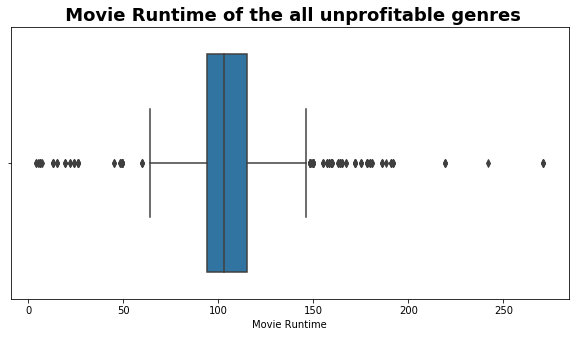

count    2942.000000
mean      105.437797
std        21.688422
min         4.000000
25%        94.000000
50%       103.000000
75%       115.000000
max       271.000000
Name: Movie Runtime, dtype: float64

In [33]:
"""Visualtize to see over all Run time for top 3 most profitable movies"""
boxplot(unprofitable_genres_df['Movie Runtime']," Movie Runtime of the all unprofitable genres")

### INSIGHT optional:
#### Overall theres not that much of a difference between run time of genres that made profit and the ones that did not. This suggests that run time has little effect on Percent profit . In fact profitable genre movies run longer . Although every second of movie production cost money more focus should be on the quality of the content . The run time suggested above should work fine !

In [34]:
#genres_df[top3_list[2]].describe()

### 3. What is the current trend for the top 3 genres

In [36]:
"""find the median return of each genre by year """
Family_yearly_gross_df = genres_df['Family'].groupby('Year').median().reset_index()
Sport_yearly_gross_df = genres_df['Sport'].groupby('Year').median().reset_index()
Music_yearly_gross_df = genres_df['Music'].groupby('Year').median().reset_index()

In [60]:
Family_yearly_gross_df.head()

,Year,Movie Runtime,IMDb Rating,Votes,Budget in millions (USD),Profit percent
0,1990,26.0,6.00,0.0,15.0,-100.000000
1,1991,93.0,7.45,318517.5,45.0,166.827922
2,1992,110.5,5.90,45239.0,30.0,34.412500
3,1993,105.0,6.95,90115.0,22.5,340.178571
4,1994,104.0,5.95,29028.5,17.5,96.383333


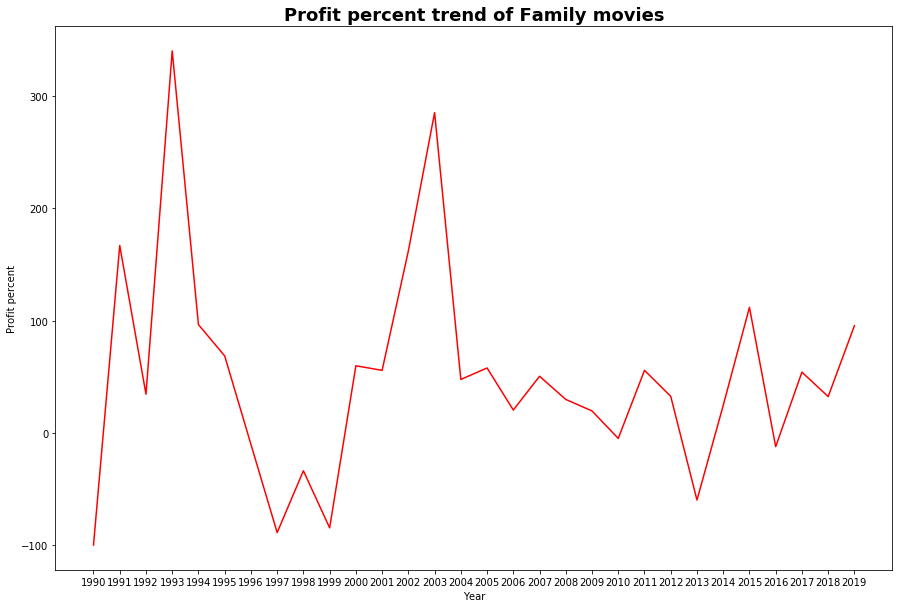

In [38]:
"""Visuaize profit percent trend  of Family based movies"""
#fig, ax = plt.subplots(figsize=(15,10))
lineplot(Family_yearly_gross_df['Year'],Family_yearly_gross_df['Profit percent'],"Profit percent trend of Family movies","Red")

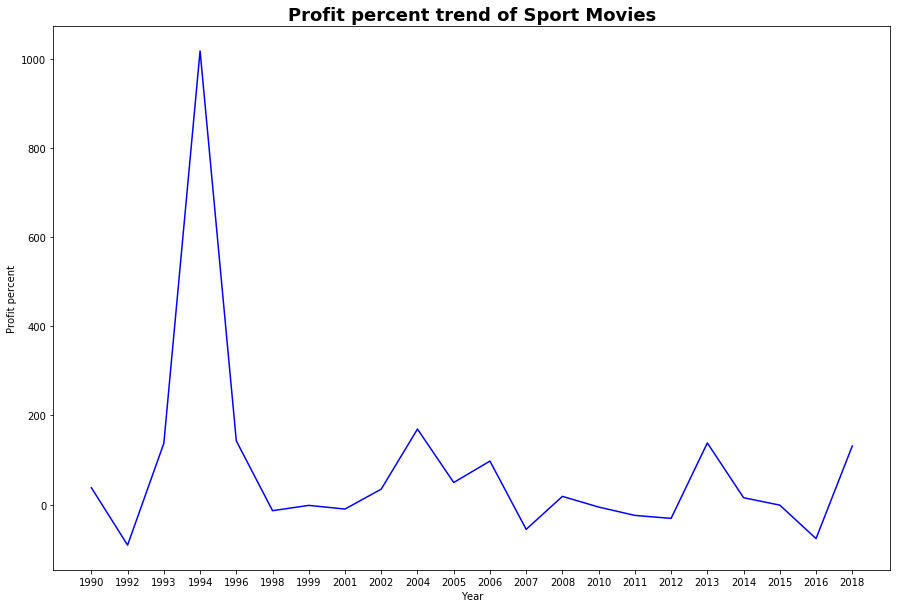

In [39]:
"""Visuaize profit percent trend  of Sport based movies"""
lineplot(Sport_yearly_gross_df['Year'],Sport_yearly_gross_df['Profit percent'],"Profit percent trend of Sport Movies" ,'blue')


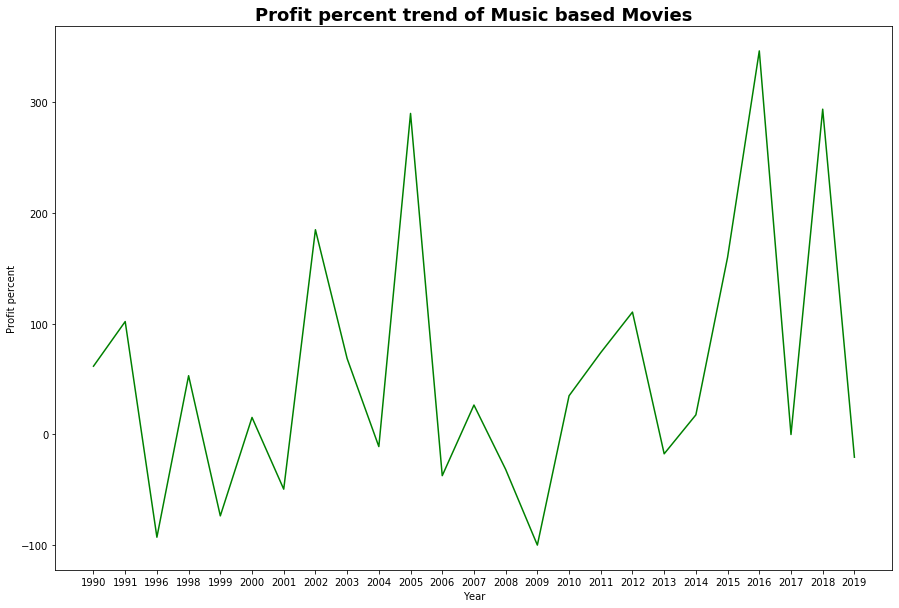

In [40]:
"""Visuaize profit percent trend  of Music based movies"""
lineplot(Music_yearly_gross_df['Year'],Music_yearly_gross_df['Profit percent'],"Profit percent trend of Music based Movies" ,'green')


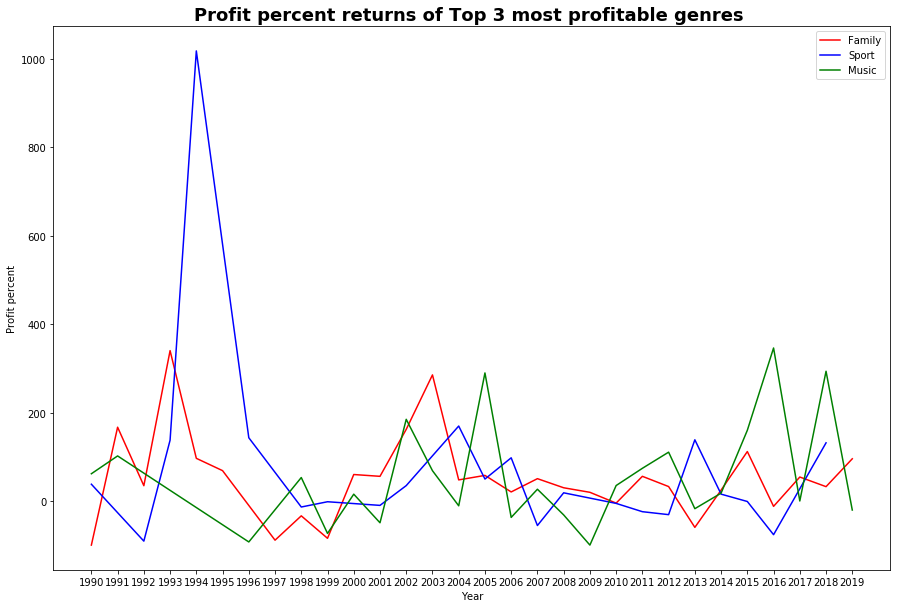

In [41]:
"""Visuaize Profit percent returns of Top 3 most profitable genre movies"""
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=Family_yearly_gross_df['Year'],y=Family_yearly_gross_df['Profit percent'],color='red',label = "Family")
sns.lineplot(x=Sport_yearly_gross_df['Year'],y=Sport_yearly_gross_df['Profit percent'],color='blue',label= "Sport")
sns.lineplot(x=Music_yearly_gross_df['Year'],y=Music_yearly_gross_df['Profit percent'],color='green',label= "Music")
plt.title("Profit percent returns of Top 3 most profitable genres ",weight='bold').set_fontsize('18')
plt.show()

### INSIGHT 3:
#### Family and Sport movies are experiencing a positive trend in return whereas Music based movies are experiencing a negative trend in returns. 

### 4. Popularity trend of the top 3 genres.

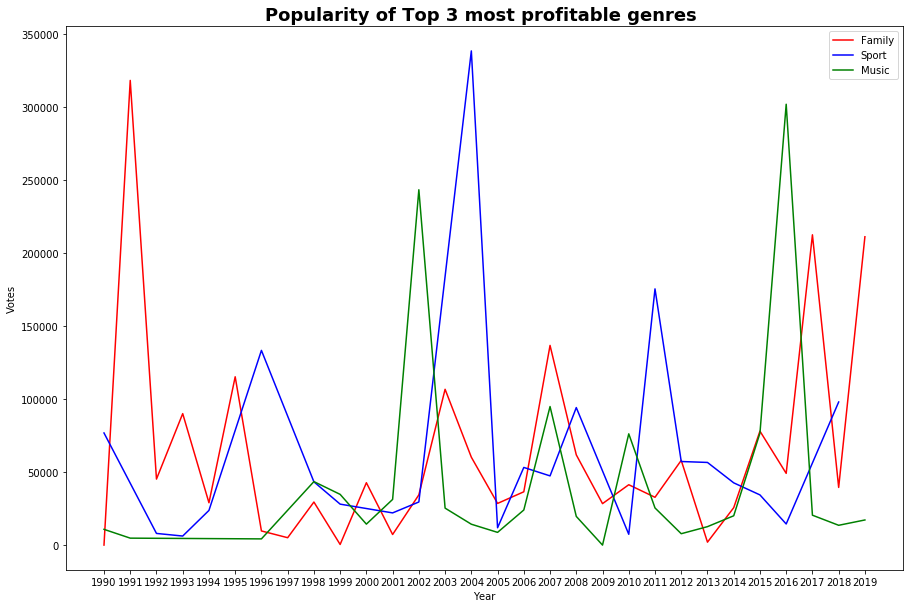

In [42]:
"""Visuaize popularity of Top 3 most profitable genres movies"""
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=Family_yearly_gross_df['Year'],y=Family_yearly_gross_df['Votes'],color='red',label = "Family")
sns.lineplot(x=Sport_yearly_gross_df['Year'],y=Sport_yearly_gross_df['Votes'],color='blue',label= "Sport")
sns.lineplot(x=Music_yearly_gross_df['Year'],y=Music_yearly_gross_df['Votes'],color='green',label= "Music")
plt.title("Popularity of Top 3 most profitable genres ",weight='bold').set_fontsize('18')
plt.show()

### INSIGHT 4:
#### We can see that popularity of movies is experiencing the same trend as the profit returns.

### 4. What kind of budget and gross income can be expected. 


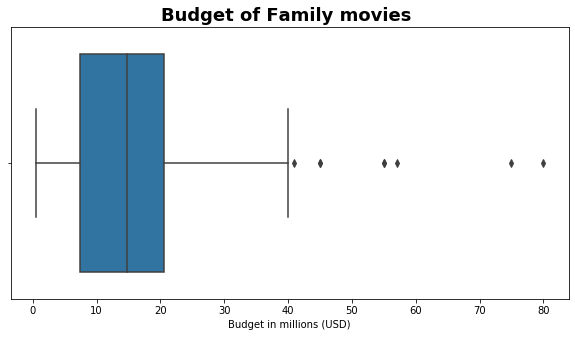

count    72.000000
mean     18.147222
std      16.925539
min       0.500000
25%       7.375000
50%      14.750000
75%      20.500000
max      80.000000
Name: Budget in millions (USD), dtype: float64

In [69]:
boxplot(genres_df['Music']['Budget in millions (USD)'],"Budget of Family movies ")

In [52]:
Family_median_df.head()

Year                         2006.0
Movie Runtime                  99.0
IMDb Rating                     6.3
Votes                       40019.0
Budget in millions (USD)       35.5
dtype: float64

In [ ]:
"""Look at the Proft Percent Return For each Genre """
plt.figure(figsize=(15,10))
graph=sns.barplot(y=single_genre_df['Votes'],x=single_genre_df['Movie Genre'])
plt.title("Popularity of genres",weight='bold').set_fontsize('18')
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
plt.show()